In [11]:
import pandas as pd                                 # data processing
import numpy as np                                  # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
dataframe=pd.read_csv("C:/Users/mukun/Desktop/data sets/redwinequality.csv")

In [13]:
dataframe 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
dataframe.shape

(1599, 12)

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
#Checking for Null / Missing Values
dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
duplicate = dataframe.duplicated()
print(duplicate.sum())
dataframe[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [19]:
#call drop duplicate on dataframe to remove dulicate and assign it back to dataframe

dataframe.drop_duplicates(inplace=True)

In [20]:
#after removing duplicate data

dataframe.shape

(1359, 12)

In [21]:
#correlation matrix

dataframe.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


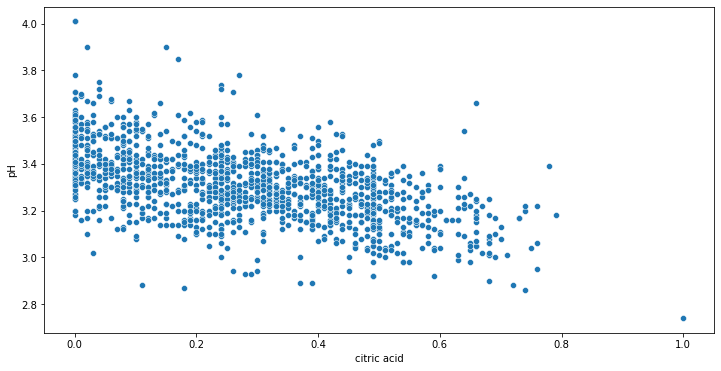

In [22]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = dataframe)
plt.show()


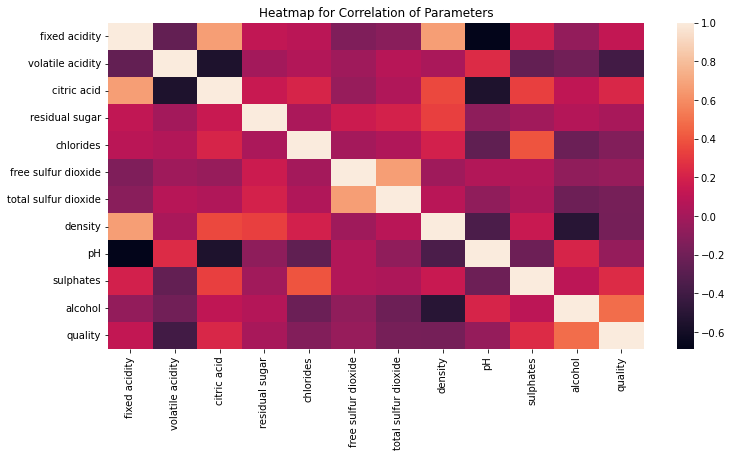

In [23]:
plt.figure(figsize = (12,6))
sns.heatmap(dataframe.corr())
plt.title('Heatmap for Correlation of Parameters')
plt.show()

In [27]:
#data frame divided into dependent and independent variables

#create seperate objects 
target = 'quality'

#seperate obj for target features
y = dataframe[target]

#seperate obj for input features
X = dataframe.drop(target, axis = 1)

In [28]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [29]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [30]:
X.shape

(1359, 11)

In [31]:
y.shape

(1359,)

In [32]:
#standard scalling
sc = StandardScaler()
x_res = sc.fit_transform(X)

In [33]:
x_res

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [34]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_res,i) for i in range(x_res.shape[1])]
vif["Features"] = X.columns

#chack the values
vif

,vif,Features
0,7.880951,fixed acidity
1,1.777884,volatile acidity
2,3.124679,citric acid
3,1.641987,residual sugar
4,1.530769,chlorides
5,1.950922,free sulfur dioxide
6,2.216688,total sulfur dioxide
7,6.281009,density
8,3.397407,pH
9,1.466779,sulphates


In [35]:
X1 = X.drop(['density'], axis=1)
X1.shape

(1359, 10)

In [36]:
scaler = StandardScaler()
scaler.fit(X1)
rescaled = scaler.transform(X1)

In [37]:
rescaled.shape

(1359, 10)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(rescaled, y, test_size=0.2, random_state=7)

In [39]:
X_train.shape,y_train.shape

((1087, 10), (1087,))

In [40]:
X_test.shape,y_test.shape

((272, 10), (272,))

In [ ]:
# Modeling 
#DECISION TREE

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [43]:
#confusion_matrix,accuracy_score,precision_score,recall_score
print('Train Accuracy:-', accuracy_score(y_train,dt_train_pred)*100)

Train Accuracy:- 100.0


In [44]:
print('Accuracy Score:-', accuracy_score(y_test,dt_test_pred)*100)

Accuracy Score:- 51.10294117647059


In [45]:
#Confusion Matrix
print(confusion_matrix(y_test, dt_test_pred))

[[ 0  1  0  1  0  0]
 [ 0  3  3  2  0  0]
 [ 1 12 84 32 11  0]
 [ 0  3 33 40 10  0]
 [ 0  0  4 15 12  0]
 [ 0  0  2  2  1  0]]


In [46]:
#claffision report

from sklearn.metrics import classification_report
print(classification_report(y_test, dt_test_pred,digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.1579    0.3750    0.2222         8
           5     0.6667    0.6000    0.6316       140
           6     0.4348    0.4651    0.4494        86
           7     0.3529    0.3871    0.3692        31
           8     0.0000    0.0000    0.0000         5

    accuracy                         0.5110       272
   macro avg     0.2687    0.3045    0.2787       272
weighted avg     0.5255    0.5110    0.5158       272



C:\Users\mukun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mukun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mukun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
